In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model,load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import plot_model

from IPython.display import SVG,display
from keras.utils.vis_utils import model_to_dot

batch_size = 32
num_classes = 11
epochs = 15

Using TensorFlow backend.


In [5]:
def hot(y):
    label_binarizer = LabelBinarizer()
    label_binarizer.fit(range(11))
    new_y = np.zeros((y.shape[0],y.shape[1]*num_classes))
    for i in range(len(y)):
        new_y[i,:] = label_binarizer.transform(y[i]).flatten()
    return new_y

In [6]:
def acccc(model):
    A = np.array(model.predict(x_test))
    c=0
    for i in range(A.shape[1]):
           c+=np.array_equal(np.argmax(np.array(A[:,i,:]),axis=1)[0:5],np.argmax(y_test[i].reshape((6,11)),axis=1)[0:5])
    print("Accuracy:",100*c/A.shape[1])
    return 100*c/A.shape[1]

# Load normal data

In [7]:
# X = np.load("resizecrop.npy")
# Y = np.load("nummertrain.npy").astype(int)

In [8]:
X = np.load("aug/resize_cropImage.npy")
Y = np.load("aug/nummertrain.npy").astype(int)
A3 = np.load("aug/resize_aug2t3ima.npy")
N3 = np.load("aug/aug2t3nummer.npy").astype(int)
A4 = np.load("aug/resize_aug3t4ima.npy")
N4 = np.load("aug/aug3t4nummer.npy").astype(int)
A5 = np.load("aug/resize_aug4t5ima.npy")
N5 = np.load("aug/aug4t5nummer.npy").astype(int)
#X = np.vstack((X,A3,A4,A5))
#Y = np.vstack((Y,N3,N4,N5))

In [9]:
Y_h = hot(Y)
N3_h = hot(N3)
N4_h = hot(N4)
N5_h = hot(N5)
x_train, x_test, y_train, y_test = train_test_split(
    X, Y_h, test_size=0.2)
x_train = np.vstack((x_train,A3,A4,A5))
y_train = np.vstack((y_train,N3_h,N4_h,N5_h))

In [7]:
y1,y2,y3,y4,y5,ynum = y_train[:,0:11],y_train[:,11:22],y_train[:,22:33],y_train[:,33:44],y_train[:,44:55],y_train[:,55:66]
y1_t,y2_t,y3_t,y4_t,y5_t,ynum_t = y_test[:,0:11],y_test[:,11:22],y_test[:,22:33],y_test[:,33:44],y_test[:,44:55],y_test[:,55:66]
print('x_train shape:', x_train.shape)
print('y_train shape:', ynum.shape)
print(x_train.shape[0], 'train samples')

x_train shape: (49325, 50, 50, 3)
y_train shape: (49325, 11)
49325 train samples


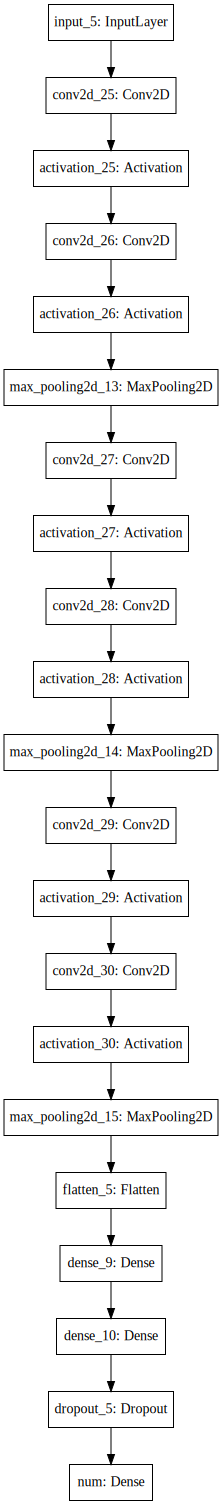

In [11]:
inpu = Input(shape=x_train.shape[1:])

x = Conv2D(32, (2, 2), padding='same')(inpu)
x = Activation('relu')(x)
x = Conv2D(32, (2, 2))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (2, 2), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(64, (2, 2))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (4, 4), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(64, (4, 4))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

conv_out = Flatten()(x)

num = Dense(128, activation='relu')(conv_out)
num = Dense(128, activation='relu')(num)
num = Dropout(0.5)(num)
numout = Dense(num_classes, activation='softmax',name="num")(num)

numtower = Model(inputs=inpu, outputs=numout)


# display(SVG(model_to_dot(model).create(prog='dot', format='svg')))
# load weights
# model.load_weights("weights.forksvhmbest.hdf5")

callbacks = [EarlyStopping(monitor='val_loss', patience=2, verbose=0)]
callbacks.append(keras.callbacks.TensorBoard(log_dir='./logs/lay3', histogram_freq=0, write_graph=True, write_images=False))

numtower.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [8]:
numtower.fit(x_train, ynum,
        batch_size=batch_size,
        epochs=epochs,
        #validation_split=0.2,
        validation_data=(x_test,ynum_t),
        shuffle=True,
        verbose=2,
        callbacks=callbacks)

score = numtower.evaluate(x_test, ynum_t, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

numtower.save('ioncanonnum.h5')

Train on 49325 samples, validate on 12332 samples
Epoch 1/15
50s - loss: 0.7231 - acc: 0.7336 - val_loss: 0.3851 - val_acc: 0.8634
Epoch 2/15
47s - loss: 0.3008 - acc: 0.8992 - val_loss: 0.2488 - val_acc: 0.9153
Epoch 3/15
47s - loss: 0.2230 - acc: 0.9262 - val_loss: 0.1939 - val_acc: 0.9342
Epoch 4/15
47s - loss: 0.1834 - acc: 0.9394 - val_loss: 0.1957 - val_acc: 0.9357
Epoch 5/15
47s - loss: 0.1571 - acc: 0.9480 - val_loss: 0.2205 - val_acc: 0.9289
Epoch 6/15
47s - loss: 0.1359 - acc: 0.9552 - val_loss: 0.1892 - val_acc: 0.9389
Epoch 7/15
47s - loss: 0.1166 - acc: 0.9622 - val_loss: 0.1793 - val_acc: 0.9494
Epoch 8/15
47s - loss: 0.1045 - acc: 0.9658 - val_loss: 0.2367 - val_acc: 0.9402
Epoch 9/15
47s - loss: 0.0923 - acc: 0.9706 - val_loss: 0.1950 - val_acc: 0.9496
Epoch 10/15
47s - loss: 0.0839 - acc: 0.9726 - val_loss: 0.1885 - val_acc: 0.9536
Validation loss: 0.188469915172
Validation accuracy: 0.953616607201



Number tower complete

starting Digit1


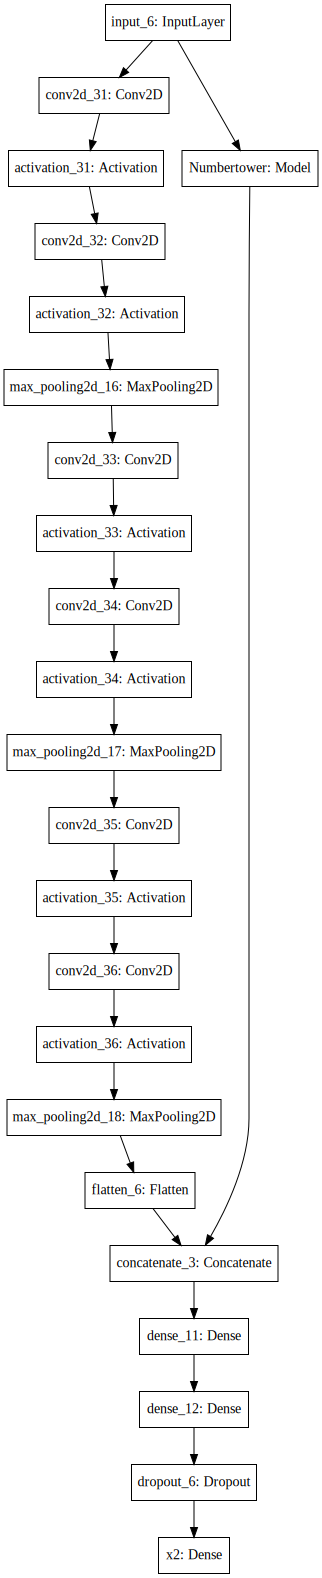

In [13]:
print()
print("Number tower complete")
print()

numtowerfre = load_model('ioncanonnum.h5')
numtowerfre.name ="Numbertower"
print("starting Digit1")

inpu = Input(shape=x_train.shape[1:])

# Number tower
numtower = numtowerfre(inpu)
numtower.trainable=False

x = Conv2D(32, (2, 2), padding='same')(inpu)
x = Activation('relu')(x)
x = Conv2D(64, (2, 2))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (2, 2), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(128, (2, 2))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (4, 4), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(256, (4, 4))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

conv_out = Flatten()(x)


x1 = keras.layers.concatenate([conv_out, numtower])

x1 = Dense(1024, activation='relu')(x1)

x1 = Dense(1024, activation='relu')(x1)

x1 = Dropout(0.5)(x1)


x1 = Dense(num_classes, activation='softmax', name='x2')(x1)

callbacks = [EarlyStopping(monitor='val_loss', patience=2, verbose=0)]
callbacks.append(keras.callbacks.TensorBoard(log_dir='./logs/digit1/lay(2,2,4)', histogram_freq=0, write_graph=True, write_images=False))

d1 = Model(inputs=inpu, outputs=x1)

# display(SVG(model_to_dot(model).create(prog='dot', format='svg')))
# load weights
# model.load_weights("weights.forksvhmbest.hdf5")

d1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'],
              callbacks=callbacks)

In [10]:
d1.fit(x_train,y1,
        batch_size=batch_size,
        epochs=epochs,
        #validation_split=0.2,
        validation_data=(x_test,y1_t),
        shuffle=True,
        verbose=2,
        callbacks=callbacks)

score = d1.evaluate(x_test, y1_t, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

d1.save('ioncanond1.h5')

/home/a/workspace/venv/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2124: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 49325 samples, validate on 12332 samples
Epoch 1/15
96s - loss: 1.7065 - acc: 0.4285 - val_loss: 0.9186 - val_acc: 0.7132
Epoch 2/15
92s - loss: 0.7725 - acc: 0.7650 - val_loss: 0.5917 - val_acc: 0.8195
Epoch 3/15
91s - loss: 0.5518 - acc: 0.8356 - val_loss: 0.4979 - val_acc: 0.8524
Epoch 4/15
94s - loss: 0.4450 - acc: 0.8672 - val_loss: 0.4977 - val_acc: 0.8618
Epoch 5/15
90s - loss: 0.3812 - acc: 0.8866 - val_loss: 0.3859 - val_acc: 0.8871
Epoch 6/15
90s - loss: 0.3229 - acc: 0.9024 - val_loss: 0.4129 - val_acc: 0.8890
Epoch 7/15
89s - loss: 0.2878 - acc: 0.9124 - val_loss: 0.4329 - val_acc: 0.8778
Epoch 8/15
89s - loss: 0.2468 - acc: 0.9264 - val_loss: 0.3961 - val_acc: 0.8948
Test loss: 0.39614939124
Test accuracy: 0.894826467726


In [11]:
numtowerfre = load_model('ioncanonnum.h5')
numtowerfre.name ="Numbertower"
print("starting Digit2")

inpu = Input(shape=x_train.shape[1:])

# Number tower
numtower = numtowerfre(inpu)
numtower.trainable=False

x = Conv2D(32, (2, 2), padding='same')(inpu)
x = Activation('relu')(x)
x = Conv2D(64, (2, 2))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (2, 2), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(128, (2, 2))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (4, 4), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(256, (4, 4))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

conv_out = Flatten()(x)


x1 = keras.layers.concatenate([conv_out, numtower])

x1 = Dense(1024, activation='relu')(x1)

x1 = Dense(1024, activation='relu')(x1)

x1 = Dropout(0.5)(x1)

callbacks = [EarlyStopping(monitor='val_loss', patience=2, verbose=0)]

d2 = Model(inputs=inpu, outputs=x1)

#display(SVG(model_to_dot(model).create(prog='dot', format='svg')))
# load weights
# model.load_weights("weights.forksvhmbest.hdf5")

d2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'],
              callbacks=callbacks)

starting Digit2


In [12]:
d2.fit(x_train,y2,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.2,
        shuffle=True,
        verbose=2,
        callbacks=callbacks)

score = d2.evaluate(x_test, y2_t, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

d2.save('ioncanond2.h5')

/home/a/workspace/venv/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2124: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 39460 samples, validate on 9865 samples
Epoch 1/15
73s - loss: 2.0206 - acc: 0.3031 - val_loss: 1.4877 - val_acc: 0.5332
Epoch 2/15
74s - loss: 1.1719 - acc: 0.6318 - val_loss: 0.8893 - val_acc: 0.7196
Epoch 3/15
72s - loss: 0.8435 - acc: 0.7421 - val_loss: 0.7257 - val_acc: 0.7814
Epoch 4/15
72s - loss: 0.6820 - acc: 0.7919 - val_loss: 0.6965 - val_acc: 0.7859
Epoch 5/15
73s - loss: 0.5777 - acc: 0.8284 - val_loss: 0.6139 - val_acc: 0.8097
Epoch 6/15
72s - loss: 0.4994 - acc: 0.8509 - val_loss: 0.5849 - val_acc: 0.8270
Epoch 7/15
75s - loss: 0.4262 - acc: 0.8715 - val_loss: 0.5858 - val_acc: 0.8269
Epoch 8/15
74s - loss: 0.3732 - acc: 0.8878 - val_loss: 0.6164 - val_acc: 0.8325
Epoch 9/15
78s - loss: 0.3310 - acc: 0.9000 - val_loss: 0.5944 - val_acc: 0.8348
Test loss: 0.571872912857
Test accuracy: 0.839604281544


In [13]:
numtowerfre = load_model('ioncanonnum.h5')
numtowerfre.name ="Numbertower"
print("starting Digit3")

inpu = Input(shape=x_train.shape[1:])

# Number tower
numtower = numtowerfre(inpu)
numtower.trainable=False

x = Conv2D(32, (2, 2), padding='same')(inpu)
x = Activation('relu')(x)
x = Conv2D(64, (2, 2))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (2, 2), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(128, (2, 2))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (4, 4), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(256, (4, 4))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

conv_out = Flatten()(x)


x1 = keras.layers.concatenate([conv_out, numtower])

x1 = Dense(1024, activation='relu')(x1)

x1 = Dense(1024, activation='relu')(x1)

x1 = Dropout(0.5)(x1)


x1 = Dense(num_classes, activation='softmax', name='x1')(x1)

callbacks = [EarlyStopping(monitor='val_loss', patience=2, verbose=0)]

d3 = Model(inputs=inpu, outputs=x1)

#display(SVG(model_to_dot(model).create(prog='dot', format='svg')))
# load weights
# model.load_weights("weights.forksvhmbest.hdf5")

d3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'],
              callbacks=callbacks)

starting Digit3


In [14]:
d3.fit(x_train,y3,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.2,
        shuffle=True,
        verbose=2,
        callbacks=callbacks)

score = d3.evaluate(x_test, y3_t, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

d3.save('ioncanond3.h5')

/home/a/workspace/venv/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2124: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 39460 samples, validate on 9865 samples
Epoch 1/15
76s - loss: 1.6044 - acc: 0.4719 - val_loss: 1.1730 - val_acc: 0.6576
Epoch 2/15
76s - loss: 1.0095 - acc: 0.6832 - val_loss: 0.7695 - val_acc: 0.7678
Epoch 3/15
76s - loss: 0.7804 - acc: 0.7615 - val_loss: 0.8018 - val_acc: 0.7556
Epoch 4/15
72s - loss: 0.6469 - acc: 0.8025 - val_loss: 0.6196 - val_acc: 0.8116
Epoch 5/15
73s - loss: 0.5521 - acc: 0.8341 - val_loss: 0.6104 - val_acc: 0.8124
Epoch 6/15
72s - loss: 0.4745 - acc: 0.8549 - val_loss: 0.5271 - val_acc: 0.8446
Epoch 7/15
72s - loss: 0.4171 - acc: 0.8760 - val_loss: 0.5016 - val_acc: 0.8541
Epoch 8/15
72s - loss: 0.3661 - acc: 0.8909 - val_loss: 0.4847 - val_acc: 0.8581
Epoch 9/15
72s - loss: 0.3270 - acc: 0.9007 - val_loss: 0.4956 - val_acc: 0.8547
Epoch 10/15
72s - loss: 0.2898 - acc: 0.9133 - val_loss: 0.5255 - val_acc: 0.8601
Epoch 11/15
72s - loss: 0.2515 - acc: 0.9245 - val_loss: 0.6021 - val_acc: 0.8631
Test loss: 0.661282473662
Test accuracy: 0.856389879987


In [16]:
numtowerfre = load_model('ioncanonnum.h5')
numtowerfre.name ="Numbertower"
print("starting Digit4")

inpu = Input(shape=x_train.shape[1:])

# Number tower
numtower = numtowerfre(inpu)
numtower.trainable=False

x = Conv2D(32, (2, 2), padding='same')(inpu)
x = Activation('relu')(x)
x = Conv2D(64, (2, 2))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (2, 2), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(128, (2, 2))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (4, 4), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(256, (4, 4))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

conv_out = Flatten()(x)


x1 = keras.layers.concatenate([conv_out, numtower])

x1 = Dense(1024, activation='relu')(x1)

x1 = Dense(1024, activation='relu')(x1)

x1 = Dropout(0.5)(x1)

callbacks = [EarlyStopping(monitor='val_loss', patience=2, verbose=0)]

d4 = Model(inputs=inpu, outputs=x1)

# display(SVG(model_to_dot(model).create(prog='dot', format='svg')))
# load weights
# model.load_weights("weights.forksvhmbest.hdf5")

d4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'],
              callbacks=callbacks)

starting Digit4


In [16]:
# d4.fit(x_train,y4,
#         batch_size=batch_size,
#         epochs=epochs,
#         validation_split=0.2,
#         shuffle=True,
#         verbose=2,
#         callbacks=callbacks)

# score = d4.evaluate(x_test, y4_t, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

/home/a/workspace/venv/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2124: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 39460 samples, validate on 9865 samples
Epoch 1/15
75s - loss: 0.6718 - acc: 0.8195 - val_loss: 0.4792 - val_acc: 0.8335
Epoch 2/15
73s - loss: 0.4641 - acc: 0.8448 - val_loss: 0.5203 - val_acc: 0.8291
Epoch 3/15
73s - loss: 0.4048 - acc: 0.8709 - val_loss: 0.3714 - val_acc: 0.8833
Epoch 4/15
75s - loss: 0.3461 - acc: 0.8931 - val_loss: 0.4050 - val_acc: 0.8871
Epoch 5/15
76s - loss: 0.3049 - acc: 0.9092 - val_loss: 0.3267 - val_acc: 0.9064
Epoch 6/15
73s - loss: 0.2766 - acc: 0.9193 - val_loss: 0.2935 - val_acc: 0.9176
Epoch 7/15
73s - loss: 0.2524 - acc: 0.9256 - val_loss: 0.2899 - val_acc: 0.9211
Epoch 8/15
73s - loss: 0.2338 - acc: 0.9330 - val_loss: 0.2767 - val_acc: 0.9234
Epoch 9/15
74s - loss: 0.2082 - acc: 0.9392 - val_loss: 0.3035 - val_acc: 0.9165
Epoch 10/15
73s - loss: 0.1943 - acc: 0.9438 - val_loss: 0.2668 - val_acc: 0.9259
Epoch 11/15
73s - loss: 0.1814 - acc: 0.9483 - val_loss: 0.2699 - val_acc: 0.9277
Epoch 12/15
72s - loss: 0.1644 - acc: 0.9518 - val_loss: 0

In [17]:
print("part2")

callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=0)] 

X444 = np.load("aug/resize_aug3t4ima.npy")
y444 = np.load("aug/aug3t4nummer.npy").astype(int)


A3 = np.load("aug/resize_cropImage.npy")[0:8690]
N3 = np.load("aug/nummertrain.npy").astype(int)[0:8690]

X444 = np.vstack((X444,A3))
y444 = np.vstack((y444,N3))

y444 = hot(y444)
x_train444, x_test444, y_train444, y_test444 = train_test_split(
    X444, y444, test_size=0.2)
y444 = y_train444[:,33:44]
y444_t= y_test444[:,33:44]

d4.fit(x_train444,y444,
        batch_size=batch_size,
        epochs=30,
        validation_split=0.2,
        shuffle=True,
        verbose=2,
        callbacks=callbacks)

score = d4.evaluate(x_test444, y444_t, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

d4.save('ioncanond4.h5')

part2


/home/a/workspace/venv/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2124: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 11123 samples, validate on 2781 samples
Epoch 1/20
21s - loss: 1.8937 - acc: 0.4870 - val_loss: 1.5487 - val_acc: 0.5102
Epoch 2/20
20s - loss: 1.5297 - acc: 0.5218 - val_loss: 1.3914 - val_acc: 0.5588
Epoch 3/20
20s - loss: 1.3667 - acc: 0.5712 - val_loss: 1.3183 - val_acc: 0.5671
Epoch 4/20
20s - loss: 1.1909 - acc: 0.6237 - val_loss: 1.1056 - val_acc: 0.6490
Epoch 5/20
20s - loss: 1.0290 - acc: 0.6772 - val_loss: 0.9460 - val_acc: 0.7123
Epoch 6/20
20s - loss: 0.8702 - acc: 0.7254 - val_loss: 0.8336 - val_acc: 0.7443
Epoch 7/20
21s - loss: 0.7560 - acc: 0.7622 - val_loss: 0.7517 - val_acc: 0.7792
Epoch 8/20
20s - loss: 0.6557 - acc: 0.7913 - val_loss: 0.7713 - val_acc: 0.7659
Epoch 9/20
20s - loss: 0.5749 - acc: 0.8184 - val_loss: 0.7798 - val_acc: 0.7792
Epoch 10/20
20s - loss: 0.4914 - acc: 0.8443 - val_loss: 0.7683 - val_acc: 0.7709
Epoch 11/20
20s - loss: 0.4371 - acc: 0.8645 - val_loss: 0.7162 - val_acc: 0.8015
Epoch 12/20
20s - loss: 0.3918 - acc: 0.8790 - val_loss: 0

In [21]:
numtowerfre = load_model('ioncanonnum.h5')
numtowerfre.name ="Numbertower"
print("starting Digit5")

inpu = Input(shape=x_train.shape[1:])

# Number tower
numtower = numtowerfre(inpu)
numtower.trainable=False

x = Conv2D(32, (2, 2), padding='same')(inpu)
x = Activation('relu')(x)
x = Conv2D(64, (2, 2))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (2, 2), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(128, (2, 2))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (4, 4), padding='same')(x)
x = Activation('relu')(x)
x = Conv2D(256, (4, 4))(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

conv_out = Flatten()(x)


x1 = keras.layers.concatenate([conv_out, numtower])

x1 = Dense(1024, activation='relu')(x1)

x1 = Dense(1024, activation='relu')(x1)

x1 = Dropout(0.5)(x1)

callbacks = [EarlyStopping(monitor='val_loss', patience=2, verbose=0)]

d5 = Model(inputs=inpu, outputs=x1)

# display(SVG(model_to_dot(model).create(prog='dot', format='svg')))
# load weights
# model.load_weights("weights.forksvhmbest.hdf5")

d5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'],
              callbacks=callbacks)

starting Digit5


In [19]:
# d5.fit(x_train,y5,
#         batch_size=batch_size,
#         epochs=epochs,
#         validation_split=0.2,
#         shuffle=True,
#         verbose=2,
#         callbacks=callbacks)

# score = d5.evaluate(x_test, y5_t, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

/home/a/workspace/venv/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2124: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 39460 samples, validate on 9865 samples
Epoch 1/15
76s - loss: 0.2112 - acc: 0.9743 - val_loss: 0.1558 - val_acc: 0.9766
Epoch 2/15
72s - loss: 0.1158 - acc: 0.9768 - val_loss: 0.1011 - val_acc: 0.9766
Epoch 3/15
72s - loss: 0.0956 - acc: 0.9768 - val_loss: 0.0955 - val_acc: 0.9766
Epoch 4/15
73s - loss: 0.0935 - acc: 0.9767 - val_loss: 0.0875 - val_acc: 0.9766
Epoch 5/15
72s - loss: 0.0882 - acc: 0.9771 - val_loss: 0.0897 - val_acc: 0.9775
Epoch 6/15
72s - loss: 0.0885 - acc: 0.9775 - val_loss: 0.0851 - val_acc: 0.9774
Epoch 7/15
74s - loss: 0.0879 - acc: 0.9780 - val_loss: 0.1081 - val_acc: 0.9770
Epoch 8/15
72s - loss: 0.0806 - acc: 0.9778 - val_loss: 0.0841 - val_acc: 0.9779
Epoch 9/15
72s - loss: 0.0825 - acc: 0.9777 - val_loss: 0.0778 - val_acc: 0.9784
Epoch 10/15
72s - loss: 0.0829 - acc: 0.9780 - val_loss: 0.0862 - val_acc: 0.9777
Epoch 11/15
72s - loss: 0.0831 - acc: 0.9781 - val_loss: 0.0924 - val_acc: 0.9779
Epoch 12/15
72s - loss: 0.0814 - acc: 0.9781 - val_loss: 0

In [22]:
print("part2")

callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=0)] 

X555 = np.load("aug/resize_aug4t5ima.npy")
y555 = np.load("aug/aug4t5nummer.npy").astype(int)


A4 = np.load("aug/resize_cropImage.npy")[0:1500]
N4 = np.load("aug/nummertrain.npy").astype(int)[0:1500]

X555 = np.vstack((X555,A4))
y555 = np.vstack((y555,N4))

y555 = hot(y555)
x_train555, x_test555, y_train555, y_test555 = train_test_split(
    X555, y555, test_size=0.2)
y555 = y_train555[:,44:55]
y555_t= y_test555[:,44:55]

d5.fit(x_train555,y555,
        batch_size=batch_size,
        epochs=40,
        validation_split=0.2,
        shuffle=True,
        verbose=2,
        callbacks=callbacks)

score = d5.evaluate(x_test555, y555_t, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

d5.save('ioncanond5.h5')

part2


/home/a/workspace/venv/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py:2124: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 1877 samples, validate on 470 samples
Epoch 1/40
3s - loss: 2.4404 - acc: 0.3900 - val_loss: 1.7098 - val_acc: 0.5596
Epoch 2/40
3s - loss: 1.9219 - acc: 0.4795 - val_loss: 1.7046 - val_acc: 0.5596
Epoch 3/40
3s - loss: 1.8436 - acc: 0.4907 - val_loss: 1.6705 - val_acc: 0.5596
Epoch 4/40
3s - loss: 1.7823 - acc: 0.4928 - val_loss: 1.5902 - val_acc: 0.5596
Epoch 5/40
3s - loss: 1.7339 - acc: 0.4944 - val_loss: 1.4598 - val_acc: 0.5596
Epoch 6/40
3s - loss: 1.6331 - acc: 0.4997 - val_loss: 1.3696 - val_acc: 0.5660
Epoch 7/40
3s - loss: 1.4986 - acc: 0.5152 - val_loss: 1.3758 - val_acc: 0.5723
Epoch 8/40
3s - loss: 1.4033 - acc: 0.5344 - val_loss: 1.2217 - val_acc: 0.5915
Epoch 9/40
3s - loss: 1.3422 - acc: 0.5424 - val_loss: 1.1748 - val_acc: 0.6064
Epoch 10/40
3s - loss: 1.2940 - acc: 0.5509 - val_loss: 1.1431 - val_acc: 0.6085
Epoch 11/40
3s - loss: 1.2570 - acc: 0.5621 - val_loss: 1.1494 - val_acc: 0.6128
Epoch 12/40
3s - loss: 1.2428 - acc: 0.5503 - val_loss: 1.1115 - val_ac

In [3]:
print("MERGING!!")

# import h5py
# f = h5py.File('ioncanond1.h5', 'r+')
# del f['optimizer_weights']
# f.close()
      
digit1 = load_model('ioncanond1.h5')
digit1.name ="digit1"

digit2 = load_model('ioncanond2.h5')
digit2.name ="digit2"

digit3 = load_model('ioncanond3.h5')
digit3.name ="digit3"

digit4 = load_model('ioncanond4.h5')
digit4.name ="digit4"

digit5 = load_model('ioncanond5.h5')
digit5.name ="digit5"

MERGING!!


In [10]:
a = Input(shape=x_train.shape[1:])

# Merging
d1 = digit1(a)

d2 = digit2(a)

d3 = digit3(a)

d4 = digit4(a)

d5 = digit5(a)

model = Model(inputs=a, outputs=[d1, d2, d3, d4, d5])

#display(SVG(model_to_dot(model).create(prog='dot', format='svg')))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [10]:
acc = acccc(model)
print("Initial accuracy: ",acc)

Accuracy: 60.298410638987995
Initial accuracy:  60.298410638987995


In [11]:
# model.fit(x_train,[y1,y2,y3,y4,y5],
#             batch_size=batch_size,
#             epochs=1,
#             #validation_split=0.2,
#             validation_data=(x_test,[y1_t,y2_t,y3_t,y4_t,y5_t]),
#             shuffle=True,
#             verbose=2)

Train on 49325 samples, validate on 12332 samples
Epoch 1/1
460s - loss: 1.4733 - digit1_loss: 0.2767 - digit2_loss: 0.4165 - digit3_loss: 0.3769 - digit4_loss: 0.3240 - digit5_loss: 0.0792 - digit1_acc: 0.9210 - digit2_acc: 0.8802 - digit3_acc: 0.8944 - digit4_acc: 0.9156 - digit5_acc: 0.9803 - val_loss: 1.3447 - val_digit1_loss: 0.2514 - val_digit2_loss: 0.4046 - val_digit3_loss: 0.3294 - val_digit4_loss: 0.2759 - val_digit5_loss: 0.0834 - val_digit1_acc: 0.9224 - val_digit2_acc: 0.8791 - val_digit3_acc: 0.9105 - val_digit4_acc: 0.9256 - val_digit5_acc: 0.9811


In [11]:
model.save("mothership.h5")